<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_dos_dados_da_UFRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# These are the library we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# Classes
# Reading the data directly from the portal
classes_url = ["https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/turmas-2017.1.csv",
              "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/turmas-2017.2.csv",
              "https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/dadosUFRN/turmas-2018.2.csv"]

grades_url = ["matricula-componente-20171.csv","matricula-componente-20172.csv","matricula-componente-20182.csv"]


# Curricular components
#subjects_url = 'http://bit.do/componentes_curriculares_ufrn'
subjects_url = 'componentes-curriculares-presenciais.csv'

# Teachers
teachers_url = 'https://raw.githubusercontent.com/repitta/CienciaDeDadosEducacionais/master/dadosUFRN/docentes.csv'

In [0]:
# Classes Columns
ClassesColumns = ['id_turma', 'codigo_turma', 'id_docente_interno', 
                'id_docente_externo', 'nivel_ensino','ano', 'periodo', 
                'descricao_horario', 'total_solicitacoes', 'capacidade_aluno', 
                'modalidade_participantes', 'id_componente_curricular', 'situacao_turma']

ClassesColumnsEnglish = ['class_id', 'class_code', 'interne_teacher_id', 
                'externe_teacher_id', 'teaching_level','year', 'semester', 
                'schedule_description', 'total_requests', 'student_capacity', 
                'modality_participants', 'curricular_component_id', 'class_situation']

# Grades Columns
GradesColumns = ['id_turma', 'discente', 'id_curso', 'nota', 'reposicao',
                 'media_final', 'numero_total_faltas', 'descricao']

GradesColumnsEnglish = ['class_id', 'student', 'course_id', 'grade', 'replacement',
                        'final_average', 'total_number_of_absences', 'description']

# Subjects Columns
SubjectsColumns = ["id_componente","codigo","nivel","nome","unidade_responsavel"]

SubjectsColumnsEnglish = ["component_id","cod","level","name_subject","responsible_unit"]

# Teachers Columns
TeachersColumns = ['id_servidor', 'nome', 'lotacao', 'admissao']

TeachersColumnsEnglish = ['server_id', 'server_name', 'unity', 'admission']

In [0]:
# Classes since 2017.1 until 2018.2
class2017_1 = pd.read_csv(classes_url[0], sep=';', usecols = ClassesColumns)
class2017_2 = pd.read_csv(classes_url[1], sep=';', usecols = ClassesColumns)
class2018_2 = pd.read_csv(classes_url[2], sep=';', usecols = ClassesColumns)

In [5]:
class2017_1.columns

Index(['id_turma', 'codigo_turma', 'id_docente_interno', 'id_docente_externo',
       'id_componente_curricular', 'nivel_ensino', 'ano', 'periodo',
       'descricao_horario', 'total_solicitacoes', 'capacidade_aluno',
       'situacao_turma', 'modalidade_participantes'],
      dtype='object')

In [6]:
class2018_2.loc[class2018_2["id_componente_curricular"] ==  57597, ['modalidade_participantes','nivel_ensino', 'situacao_turma']]

,modalidade_participantes,nivel_ensino,situacao_turma
6115,Presencial,GRADUAÇÃO,ABERTA
6116,Presencial,GRADUAÇÃO,ABERTA
6117,Presencial,GRADUAÇÃO,ABERTA
6118,Presencial,GRADUAÇÃO,ABERTA
6119,Presencial,GRADUAÇÃO,ABERTA
6120,Presencial,GRADUAÇÃO,ABERTA
6121,Presencial,GRADUAÇÃO,ABERTA
6122,Presencial,GRADUAÇÃO,ABERTA
6123,Presencial,GRADUAÇÃO,ABERTA
6124,Presencial,GRADUAÇÃO,ABERTA


In [0]:
# Grades of the students since 2017.1 until 2018.2
grades2017_1 = pd.read_csv(grades_url[0], sep=';', usecols = GradesColumns)
grades2017_2 = pd.read_csv(grades_url[1], sep=';', usecols = GradesColumns)
grades2018_2 = pd.read_csv(grades_url[2], sep=';', usecols = GradesColumns)

In [8]:
grades2017_1.columns

Index(['id_turma', 'discente', 'id_curso', 'nota', 'reposicao', 'media_final',
       'numero_total_faltas', 'descricao'],
      dtype='object')

In [0]:
# Curricular components
Original_Subjects_Data = pd.read_csv(subjects_url, sep=';', usecols = SubjectsColumns)

In [0]:
# Teachers
Original_Teachers_Data = pd.read_csv(teachers_url, sep=';', usecols = TeachersColumns)

In [0]:
# Setting priginal data into one vector due to easier manipulation
Original_Classes_Data = [class2017_1, class2017_2, class2018_2]

# Setting classes as a copy from Original_Classes_Data
classes = Original_Classes_Data

In [0]:
# Renaming all columns from the dataframe to english
for i in range(3):
  for col_id in range(len(ClassesColumnsEnglish)):
    classes[i].rename(columns={ClassesColumns[col_id]:ClassesColumnsEnglish[col_id]}, inplace=True)

In [13]:
classes[0].loc[classes[0]["curricular_component_id"] == 57597].head()

,class_id,class_code,interne_teacher_id,externe_teacher_id,curricular_component_id,teaching_level,year,semester,schedule_description,total_requests,student_capacity,class_situation,modality_participants
1987,57595155,01A,5753317.0,NaN,57597,GRADUAÇÃO,2017,1,4M34 35T12 (13/02/2017 - 27/06/2017),46.0,3.0,EXCLUÍDA,Presencial
1988,57595155,01A,5757550.0,NaN,57597,GRADUAÇÃO,2017,1,4M34 35T12 (13/02/2017 - 27/06/2017),46.0,3.0,EXCLUÍDA,Presencial
1989,57595156,01B,5753317.0,NaN,57597,GRADUAÇÃO,2017,1,6M34 35T12 (13/02/2017 - 27/06/2017),4.0,3.0,EXCLUÍDA,Presencial
1990,57595156,01B,5757550.0,NaN,57597,GRADUAÇÃO,2017,1,6M34 35T12 (13/02/2017 - 27/06/2017),4.0,3.0,EXCLUÍDA,Presencial
1991,57595157,01C,5757550.0,NaN,57597,GRADUAÇÃO,2017,1,4M56 35T12 (13/02/2017 - 27/06/2017),27.0,3.0,EXCLUÍDA,Presencial


In [0]:
# Defining the necessary columns 
cols = ['class_id', 'class_code', 'interne_teacher_id', 'externe_teacher_id',
        'teaching_level','year', 'semester', 'schedule_description',
        'total_requests', 'student_capacity', 'modality_participants',
        'component_id', 'class_situation']

for i in range(3):
  # Component_id columns must have the same name in both dataframes, so we can do the merge
  classes[i].rename(columns={'curricular_component_id': 'component_id'}, inplace=True)
  
  # Changing some columns types in this step
  classes[i].component_id = classes[i].component_id.astype(str)
  classes[i].interne_teacher_id = classes[i].interne_teacher_id.astype(str)
  classes[i].externe_teacher_id = classes[i].externe_teacher_id.astype(str)
  classes[i].class_id = classes[i].class_id.astype(str)
  classes[i].schedule_description = classes[i].schedule_description.astype(str)

  # Filtering by the classes that are presential, from graduation and have been consolidated
  classes[i] = classes[i][classes[i]['modality_participants']=="Presencial"]
  classes[i] = classes[i][classes[i]['teaching_level']=='GRADUAÇÃO']
  classes[i] = classes[i][ (classes[i]['class_situation'] =='CONSOLIDADA') | (classes[i]['class_situation'] =='ABERTA')]
   
  # Filtering by the columns defined at the begining
  classes[i] = classes[i][cols]
  
  # Removing all NaN from the columns 'interne_teacher_id' and 'externe_teacher_id'
  classes[i].externe_teacher_id = classes[i].externe_teacher_id.replace('nan','')
  classes[i].interne_teacher_id = classes[i].interne_teacher_id.replace('nan','')
  
  # Joining both columns of teachers_id into one 
  classes[i]['teacher_id'] = classes[i]['interne_teacher_id'] + classes[i]['externe_teacher_id']

In [15]:
classes[2].loc[classes[2]["component_id"] == '57597']

,class_id,class_code,interne_teacher_id,externe_teacher_id,teaching_level,year,semester,schedule_description,total_requests,student_capacity,modality_participants,component_id,class_situation,teacher_id
6115,57627163,01A,5754369.0,,GRADUAÇÃO,2018,2,24M12 2T34 (30/07/2018 - 01/12/2018),24.0,25.0,Presencial,57597,ABERTA,5754369.0
6116,57627164,01B,5754369.0,,GRADUAÇÃO,2018,2,24M12 2T34 (30/07/2018 - 01/12/2018),10.0,25.0,Presencial,57597,ABERTA,5754369.0
6117,57627165,01C,5754369.0,,GRADUAÇÃO,2018,2,24M12 2T56 (30/07/2018 - 01/12/2018),13.0,25.0,Presencial,57597,ABERTA,5754369.0
6118,57627166,01D,5754369.0,,GRADUAÇÃO,2018,2,24M12 2T56 (30/07/2018 - 01/12/2018),19.0,25.0,Presencial,57597,ABERTA,5754369.0
6119,57627168,02A,5753317.0,,GRADUAÇÃO,2018,2,24M56 3T34 (30/07/2018 - 01/12/2018),36.0,30.0,Presencial,57597,ABERTA,5753317.0
6120,57627169,02B,5753317.0,,GRADUAÇÃO,2018,2,24M56 3T34 (30/07/2018 - 01/12/2018),26.0,30.0,Presencial,57597,ABERTA,5753317.0
6121,57627170,02C,5760355.0,,GRADUAÇÃO,2018,2,24M56 3T56 (30/07/2018 - 01/12/2018),26.0,20.0,Presencial,57597,ABERTA,5760355.0
6122,57627170,02C,5753317.0,,GRADUAÇÃO,2018,2,24M56 3T56 (30/07/2018 - 01/12/2018),26.0,20.0,Presencial,57597,ABERTA,5753317.0
6123,57627170,02C,5752264.0,,GRADUAÇÃO,2018,2,24M56 3T56 (30/07/2018 - 01/12/2018),26.0,20.0,Presencial,57597,ABERTA,5752264.0
6124,57627171,02D,5760355.0,,GRADUAÇÃO,2018,2,24M56 3T56 (30/07/2018 - 01/12/2018),15.0,20.0,Presencial,57597,ABERTA,5760355.0


In [0]:
# The column schedule_description has the date of when it was taught, but that date it's not that important
# So we are leaving in each class dataframe schedule_description column only what is necessary
def splitSchedule(row):
    return row['schedule_description'].split('(')[0]

for i in range(3):
    classes[i]['schedule_description'] = classes[i].apply(splitSchedule, axis=1)

In [17]:
# Placing the original data from grades into a vector for the same reason we did it before with classes
original_Grades = [grades2017_1, grades2017_2, grades2018_2]
grades = original_Grades

# Defining the columns that we are going to use
cols = ['class_id', 'student', 'course_id', 'final_average', 
        'total_number_of_absences', 'description', 'year','semester', 'period']

# Adding year and period in each dataframe of grades
year = 2017 # The year we decide to start our study
for i in range(3):
  grades[i]['year'] = year
  if i == 0 : #i%2==0:
    grades[i]['semester'] = 1
    grades[i]['period'] = year+0.0 # For better viewing in graphics
  else:
    grades[i]['semester'] = 2
    grades[i]['period'] = year+0.5 # For better viewing in graphics
    year += 1

# Renaming all columns from the dataframe to english
  for col_id in range(len(GradesColumnsEnglish)):
    grades[i].rename(columns={GradesColumns[col_id]:GradesColumnsEnglish[col_id]}, inplace=True)
  
# Filtering by the columns defined at the begining 
  grades[i] = grades[i][cols]
  
# Renaming the column for better manipulation
  grades[i].rename(columns={'total_number_of_absences': 'absences'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [0]:
# Setting Subjects as copy of original_Subjects
subjects = Original_Subjects_Data

# Renaming the columns from subjects 
for i in range(len(SubjectsColumnsEnglish)):
  subjects.rename(columns={SubjectsColumns[i]:SubjectsColumnsEnglish[i]}, inplace=True)

# Leaving only graduation subjects from ECT
subjects = subjects[subjects['level']=='G']
d_ect    = subjects[subjects['responsible_unit'] == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA']
# Concatenating the dataframes
#subjects = pd.concat([d_dimap, d_imd,d_ect])
subjects = d_ect
cols = ["component_id","cod","name_subject","responsible_unit"]
subjects = subjects[cols]


In [0]:
# Setting teachers as a copy of original_Teachers so we can manipulate safetly
teachers = Original_Teachers_Data

# Renaming the columns from teachers 
for i in range(len(TeachersColumnsEnglish)):
  teachers.rename(columns={TeachersColumns[i]:TeachersColumnsEnglish[i]}, inplace=True)

# Filtering from Teachers only those who gives class at IMD or DIMAp
d_ect = teachers[teachers.unity == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA']

# Concatenating the dataframes
#teachers = pd.concat([d_imd, d_dimap,d_ect])
teachers = d_ect

# Removing the columns that are not necessary anymore
cols = ["server_id","server_name","admission", "unity"]
teachers = teachers[cols]

# Applying a function that will leave into admission column only data in the format yyyy-mm-dd (year-month-day)
def splitAdmission(row):
    return row['admission'].split('-')[0]

teachers['admission'] = teachers.apply(splitAdmission, axis=1)

In [0]:
# Concatenating all classes since 2017.1 until 2018.2
merge_classes = classes[0]
for i in range(1,3):
  merge_classes = pd.concat([merge_classes, classes[i]])

In [0]:
grades[2][["class_id","year"]]

In [0]:
# Concatenating all grades since 2017.1 until 2018.2
merge_grades = grades[0]
for i in range(1,3):
  merge_grades = pd.concat([merge_grades, grades[i]])

In [0]:
# Defining the columns that are necessary
cols = ["class_id","class_code", "cod", "teacher_id","schedule_description","total_requests","year", "semester"
           ,"student_capacity","component_id", "name_subject"]

# Doing the merge between two dataframes (classes and subjects) using component_id as reference
merge_class_subjects = pd.merge(merge_classes, subjects, on='component_id')

# Leaving only the columns we need
merge_class_subjects = merge_class_subjects[cols]

# Changing the type of teacher_id to float so the merge can be completed
merge_class_subjects.teacher_id = merge_class_subjects.teacher_id.astype(float)

In [0]:
# Renaming the id_server to id_teacher so the merge can be done
teachers.rename(columns={'server_id':'teacher_id'}, inplace=True)

# Converting the id_teacher column to float
teachers.teacher_id = teachers.teacher_id.astype(float)

# Merging two dataframes (teachers and classes_subjects) on 'teacher_id'
merge_teac_cla_stu = pd.merge(merge_class_subjects, teachers, on='teacher_id')

In [0]:
# Converting some columns types so the merge can be done
merge_grades.class_id = merge_grades.class_id.astype(str)
merge_grades.semester = merge_grades.semester.astype(int)
merge_grades.year = merge_grades.year.astype(int)

In [0]:
b = merge_grades.loc[merge_grades["class_id"] =="57600908", "final_average"]
b

In [65]:
merge_teac_cla_stu.loc[(merge_teac_cla_stu["name_subject"] ==  "LÓGICA DE PROGRAMAÇÃO") & merge_teac_cla_stu["year"] == 2018,"class_id"]

Series([], Name: class_id, dtype: object)

In [0]:
# Doing the final merge between all dataframes using "class_Id", "year" and "semester" as reference
finalData = pd.merge(merge_teac_cla_stu, merge_grades, on=['class_id','year','semester'])

In [62]:
finalData.loc[finalData["class_id"] =="57600908", ["final_average","year","name_subject"]]

,final_average,year,name_subject
72286,7.3,2017,LÓGICA DE PROGRAMAÇÃO
72289,8.7,2017,LÓGICA DE PROGRAMAÇÃO
72292,0.0,2017,LÓGICA DE PROGRAMAÇÃO
72295,9.0,2017,LÓGICA DE PROGRAMAÇÃO
72298,8.0,2017,LÓGICA DE PROGRAMAÇÃO
72301,0.0,2017,LÓGICA DE PROGRAMAÇÃO
72304,5.5,2017,LÓGICA DE PROGRAMAÇÃO
72307,0.0,2017,LÓGICA DE PROGRAMAÇÃO
72310,7.5,2017,LÓGICA DE PROGRAMAÇÃO
72313,0.1,2017,LÓGICA DE PROGRAMAÇÃO


In [0]:
# Removing duplicated students in each class
classes_id = set(finalData.class_id)
cp_finalData = finalData
new_dt = pd.DataFrame()
  
for i in classes_id:
  # Auxiliar dataframe
  aux_dt = cp_finalData[cp_finalData.class_id == i] 
  aux_dt = aux_dt[~aux_dt.student.duplicated()]
  new_dt = pd.concat([new_dt, aux_dt])

finalData = new_dt

In [0]:
# Showing the final dataframe
finalData.head()

In [53]:
a = finalData.loc[ (finalData["name_subject"] == "LÓGICA DE PROGRAMAÇÃO") & (finalData["year"] ==2018),["final_average"]]
a["final_average"].unique()


array([nan])

In [37]:
yield_analysis.loc[yield_analysis["name_subject"] == "LÓGICA DE PROGRAMAÇÃO","year"]

39    2017
Name: year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


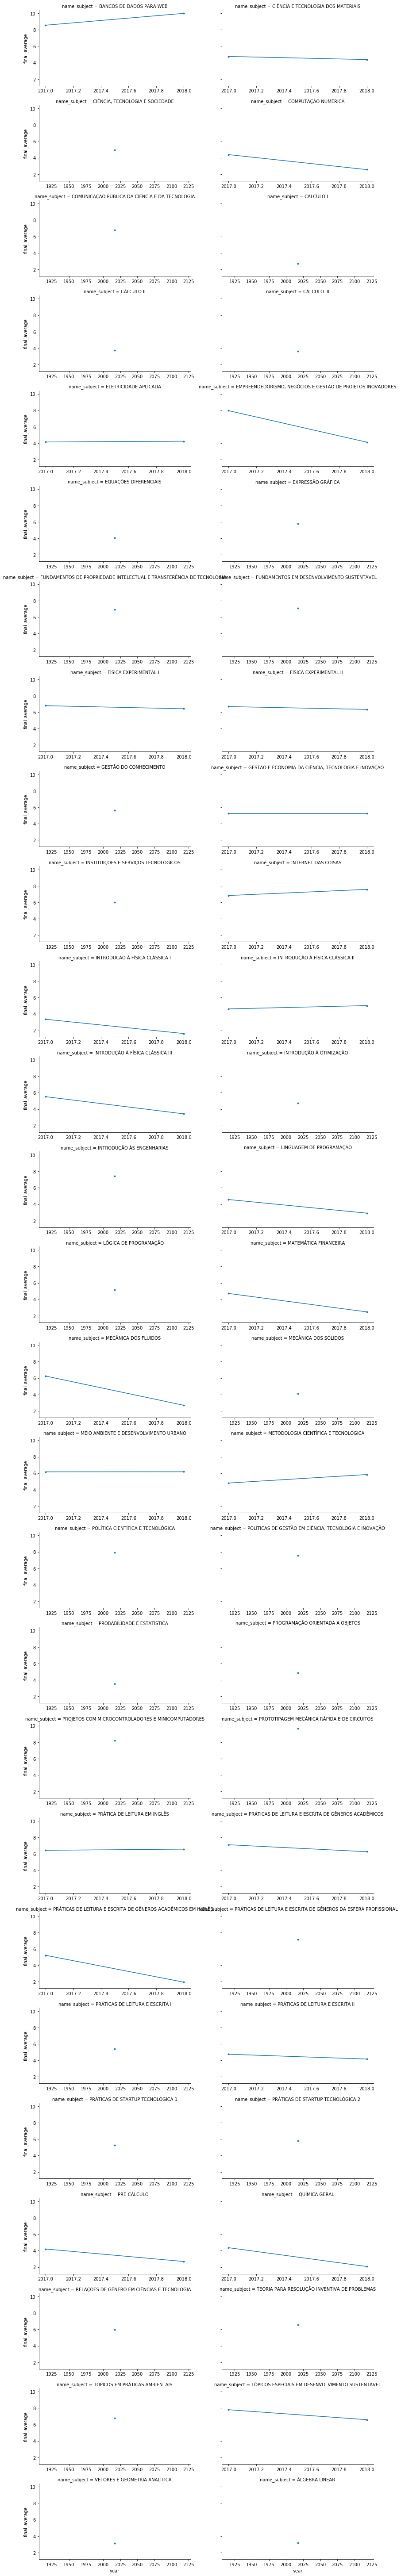

In [35]:
# Doing a pivot table to show final_average through years in each subject
yield_analysis = finalData.pivot_table(index = ["name_subject", "year"], values="final_average", aggfunc = np.mean)

# Tranforming the pivot_table into a dataframe
yield_analysis = yield_analysis.reset_index() 

# Creating graphics with Seaborn
average_subjects = sns.FacetGrid(yield_analysis, col = "name_subject", col_wrap=2, size=3, aspect=2, sharex=False)
average_subjects.map(plt.plot,"year", "final_average", marker = ".")  
plt.show()